In [18]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# Question 3


## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [19]:
image = cv2.imread('img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(image)

(-0.5, 383.5, 287.5, -0.5)

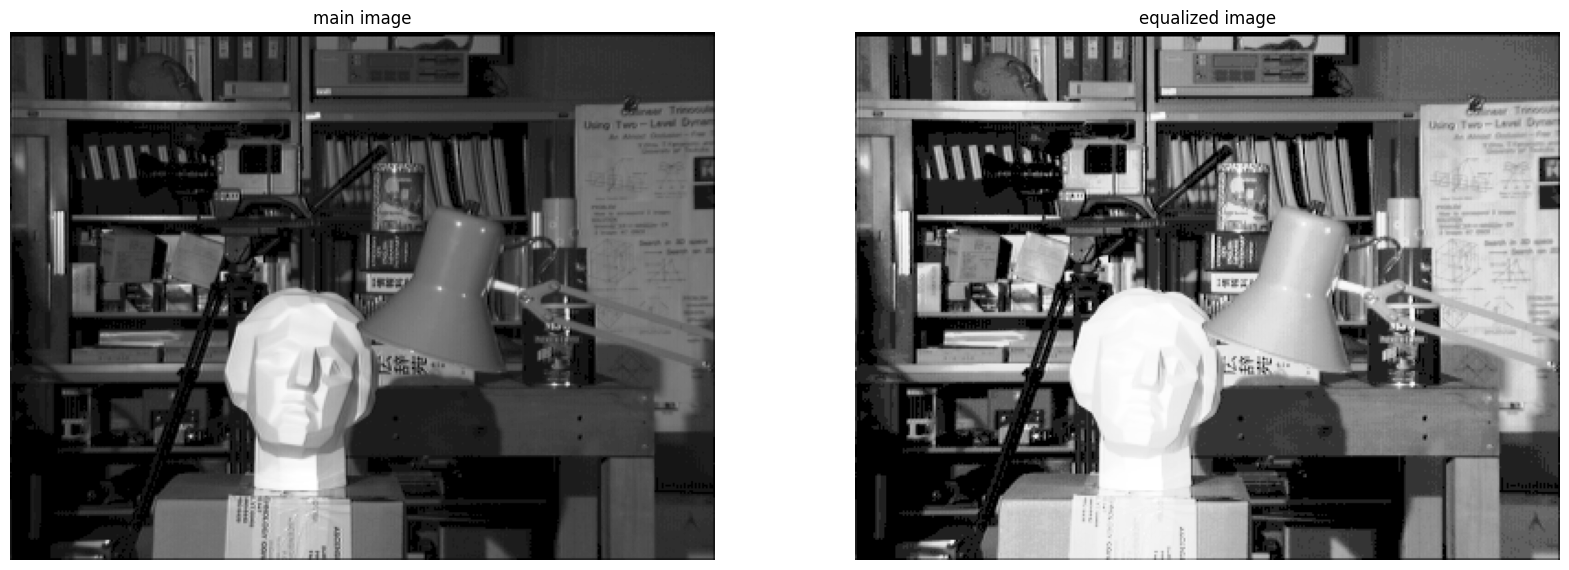

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b1


<h3> in this section we want to implement the first method for ACE </h3>
<h3> you are free to use opencv library </h3>


In [32]:
def ACE1(image, gridSize):
    '''
    Apply Adaptive Contrast Enhancement (ACE) using the first method
    (calculating transition function for each grid)
    input(s):
      image (ndarray): input image
      gridSize (int): window size for calculating histogram equalization
    output(s):
      output_image (ndarray): improved image
    '''
    x, y = image.shape
    output_image = image.copy()

    # Apply histogram equalization to each grid
    for i in range(0, x, gridSize):
        for j in range(0, y, gridSize):
            grid = image[i:i+gridSize, j:j+gridSize]
            if grid.shape[0] > 0 and grid.shape[1] > 0:
                equalized_grid = cv2.equalizeHist(grid)
                output_image[i:i+gridSize, j:j+gridSize] = equalized_grid

    return output_image


(-0.5, 383.5, 287.5, -0.5)

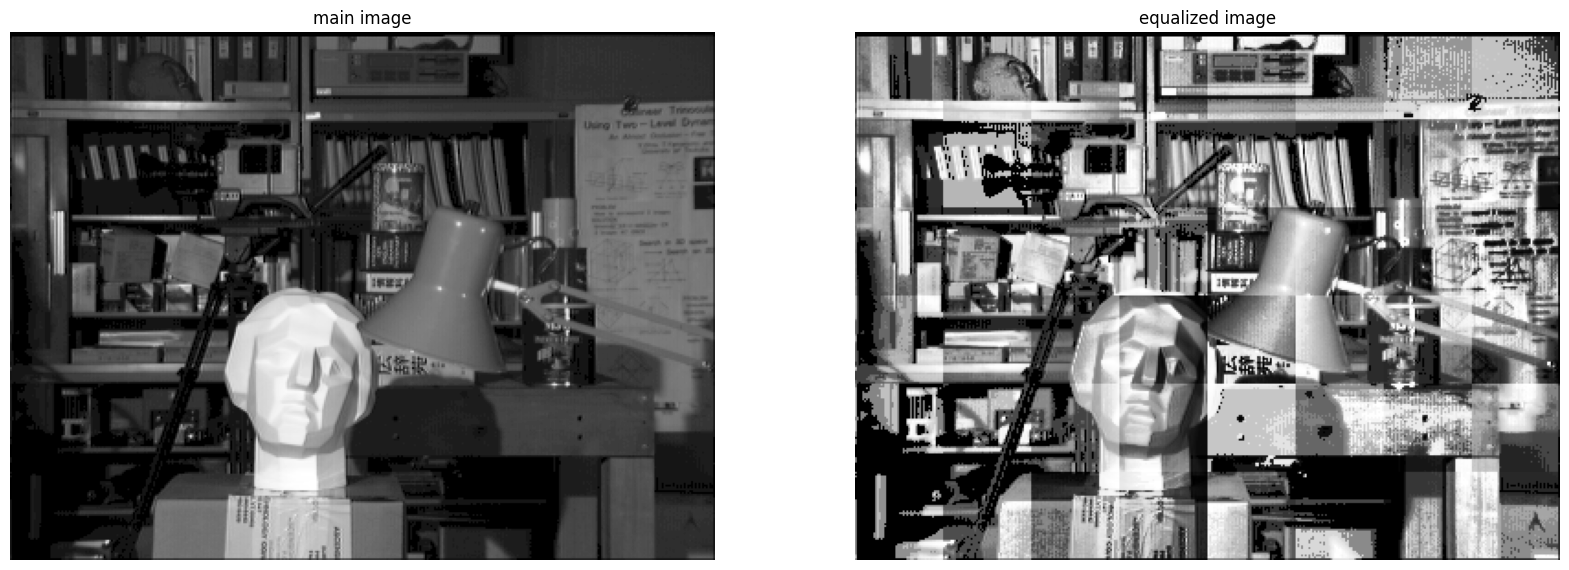

In [33]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b2

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you are free to use opencv library </h3>

In [34]:
def ACE2(image, gridSize):
    '''
    Apply Adaptive Contrast Enhancement (ACE) using the second method
    (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()

    # Apply padding to the image
    padded_image = cv2.copyMakeBorder(image, gridSize[0]//2, gridSize[0]//2, gridSize[1]//2, gridSize[1]//2, cv2.BORDER_REFLECT)

    # Iterate over each pixel of the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract neighborhood defined by gridSize
            neighborhood = padded_image[i:i+gridSize[0], j:j+gridSize[1]]
            # Apply histogram equalization to the neighborhood
            equalized_neighborhood = cv2.equalizeHist(neighborhood)
            # Replace the central pixel value with the equalized value
            output[i, j] = equalized_neighborhood[gridSize[0]//2, gridSize[1]//2]

    return output


(-0.5, 383.5, 287.5, -0.5)

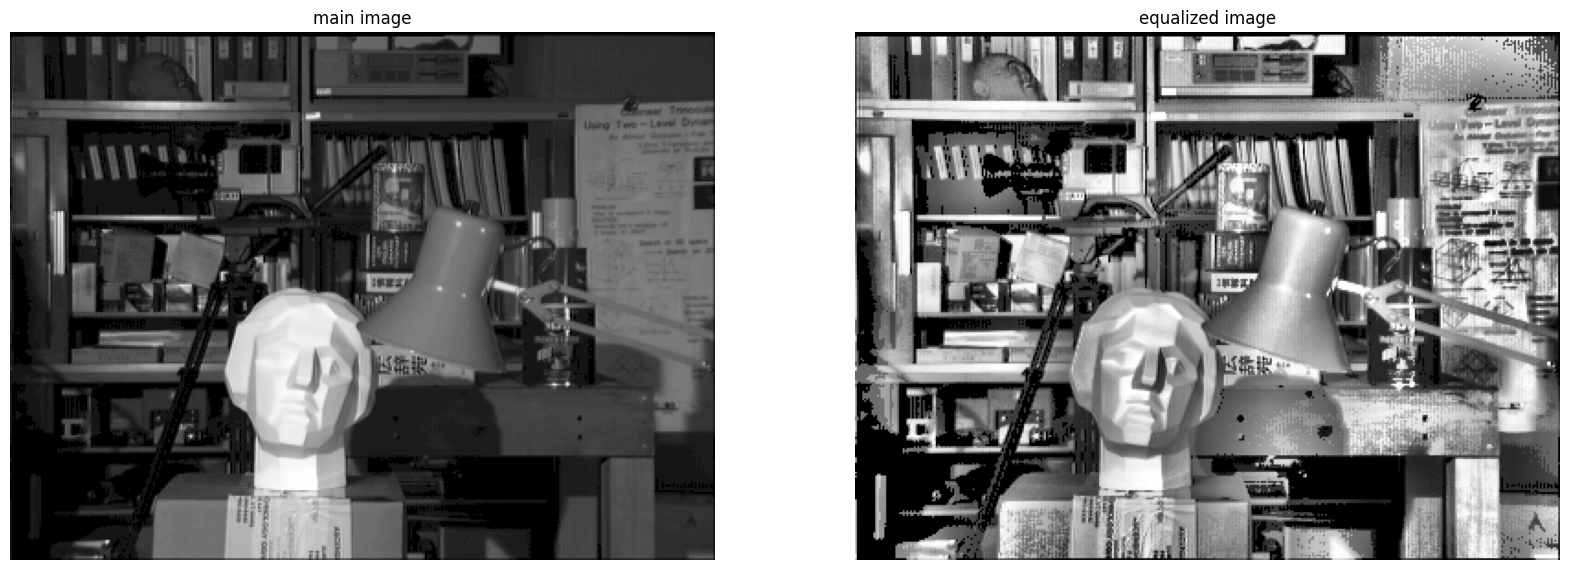

In [35]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b3

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [29]:
def CLAHE(image, gridSize, clip_limit):
    '''
    Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) using the second method
    (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()

    # Apply padding to the image
    padded_image = cv2.copyMakeBorder(image, gridSize[0]//2, gridSize[0]//2, gridSize[1]//2, gridSize[1]//2, cv2.BORDER_REFLECT)

    # Iterate over each pixel of the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract neighborhood defined by gridSize
            neighborhood = padded_image[i:i+gridSize[0], j:j+gridSize[1]]
            # Calculate histogram for the neighborhood
            hist, _ = np.histogram(neighborhood, bins=256, range=(0, 256))
            # Apply contrast limiting to the histogram
            clipped_hist = np.clip(hist, 0, clip_limit)
            # Calculate cumulative distribution function (CDF) for the clipped histogram
            cdf = np.cumsum(clipped_hist)
            # Calculate transition function for each pixel
            transition_func = (cdf[neighborhood] - cdf[neighborhood.min()]) * 255 / (neighborhood.size - cdf[neighborhood.min()])
            # Replace central pixel value with equalized value
            output[i, j] = transition_func[gridSize[0]//2, gridSize[1]//2]

    return output


(-0.5, 383.5, 287.5, -0.5)

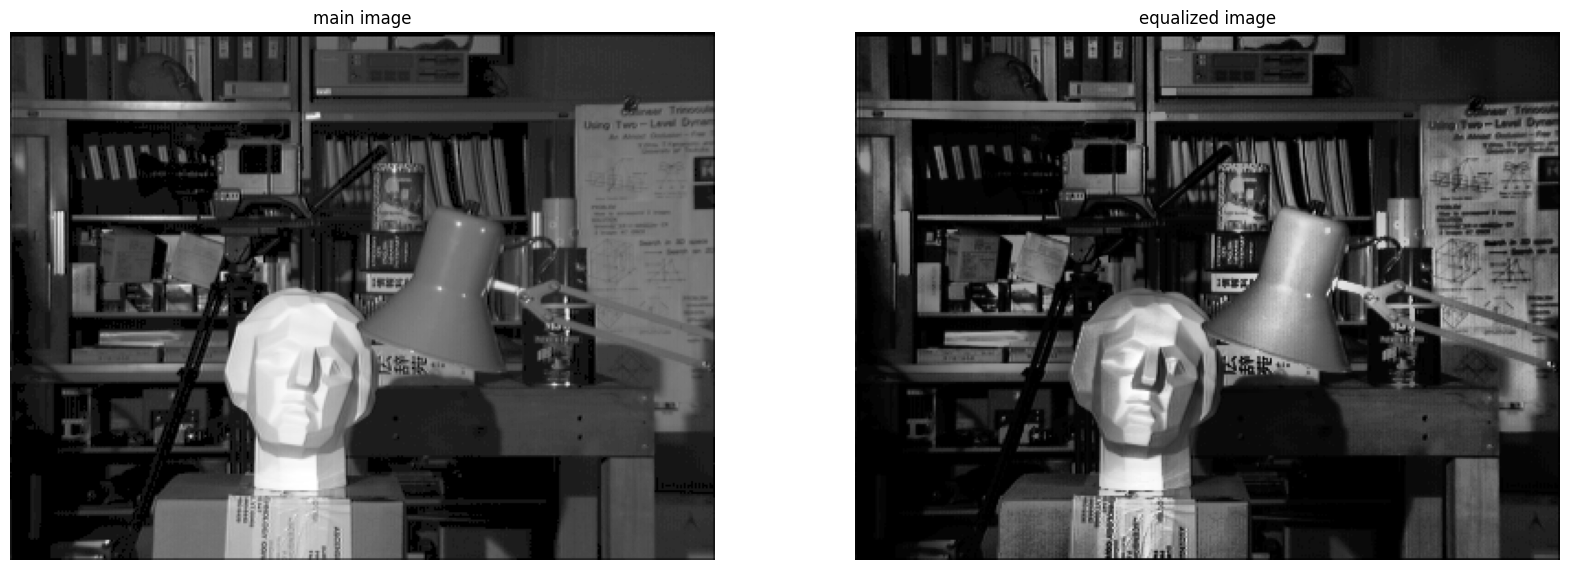

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

# part c


<h3> in this section we want to implement CLAHE using opencv </h3>


In [31]:
def CLAHE(image, gridSize, clipLimit):
    '''
    use opencv library for CLAHE.
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=gridSize)
    clahe_output = clahe.apply(image)
    return clahe_output

<h3> run the following sections to answer part c </h3>


(-0.5, 383.5, 287.5, -0.5)

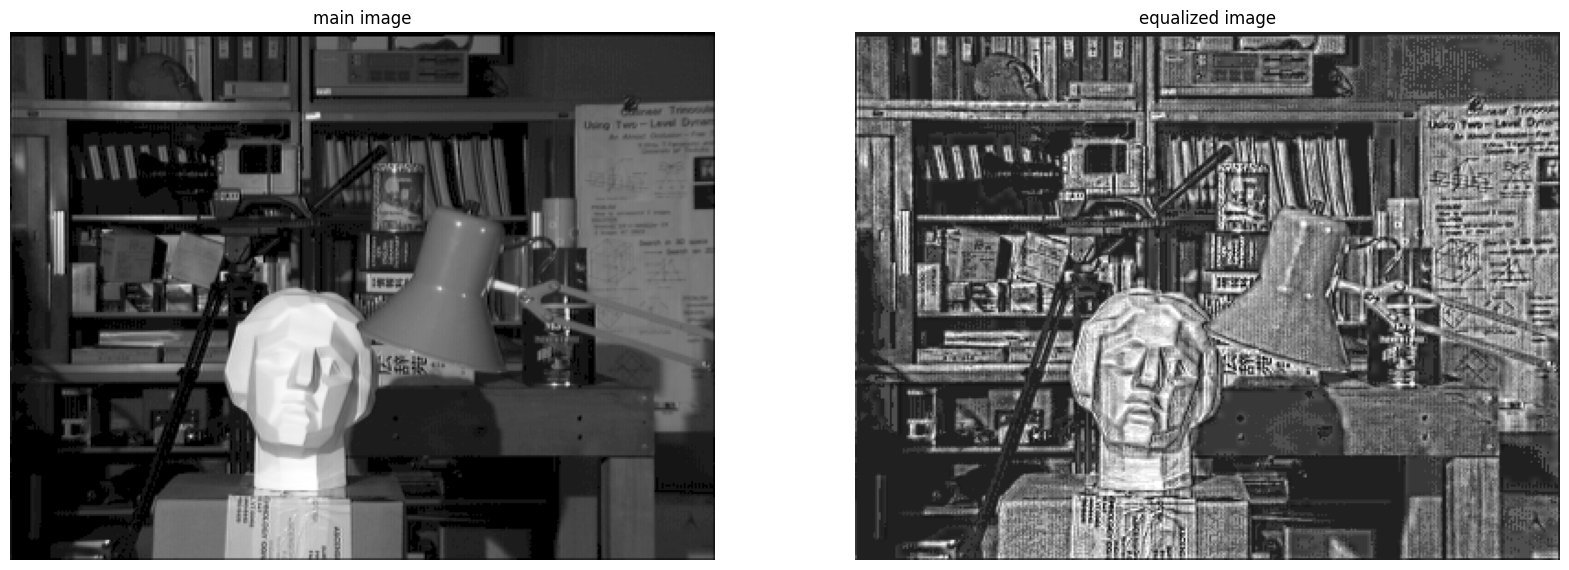

In [39]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image1 = CLAHE(image,(128,128), 2)
plt.imshow(output_image1, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

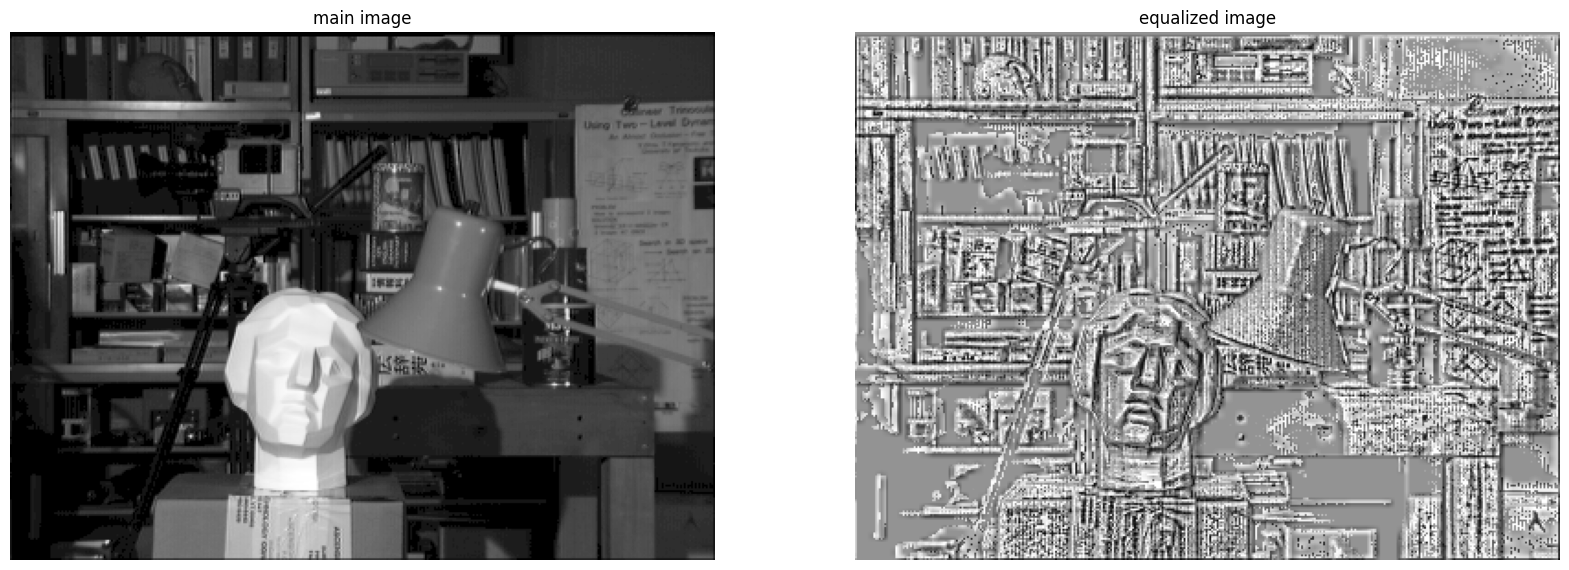

In [40]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image2 = CLAHE(image,(128,128), 128)
plt.imshow(output_image2, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

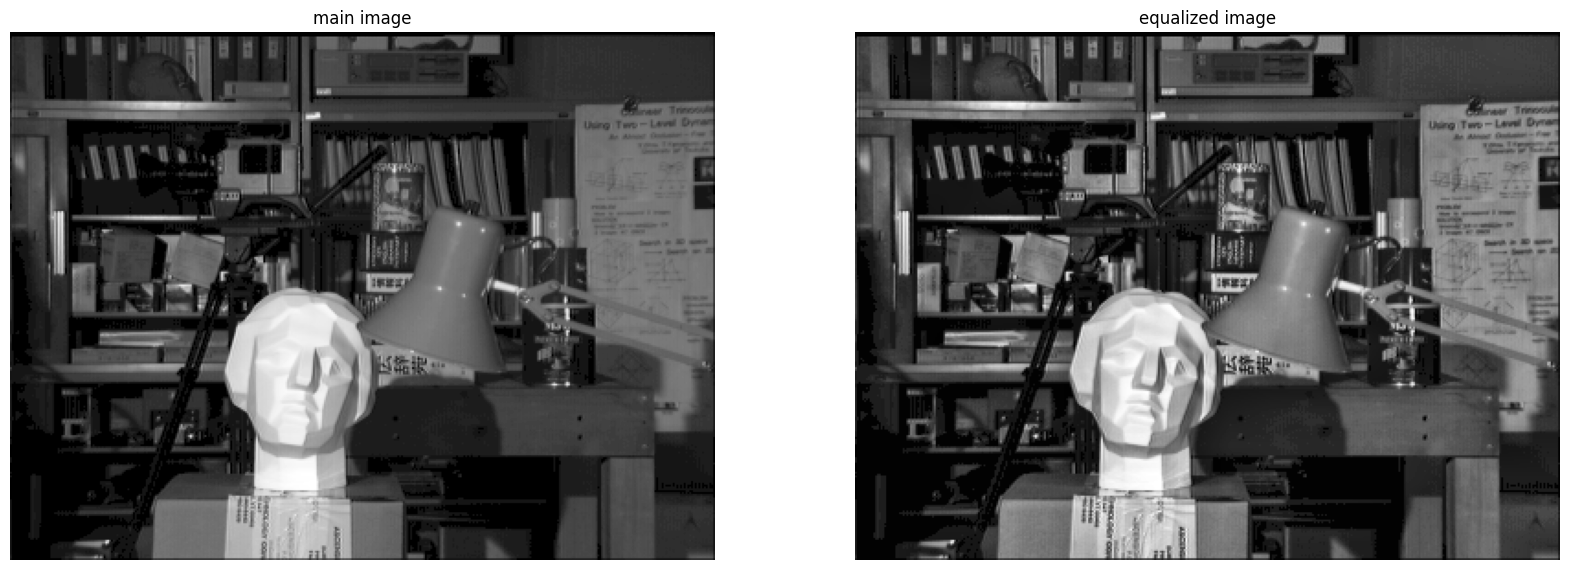

In [41]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image3 = CLAHE(image,(16,16), 2)
plt.imshow(output_image3, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

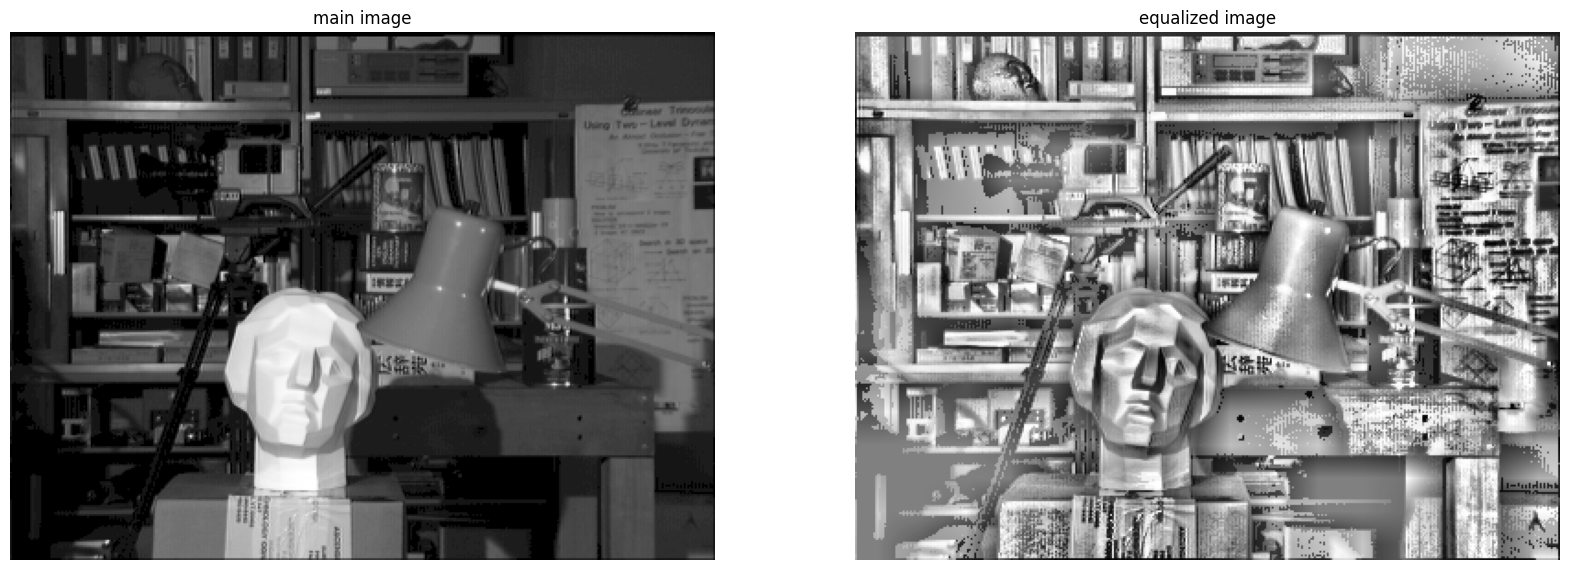

In [42]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image4 = CLAHE(image,(16,16), 128)
plt.imshow(output_image4, cmap='gray')
plt.title('equalized image')
plt.axis('off')